In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 736.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 135.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 143.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
data_24 = pd.read_excel('sensor_readings_24.xlsx')
data_4 = pd.read_excel('sensor_readings_4.xlsx')

data_24_without_class = data_24.drop('class', axis=1)
data_4_without_class = data_4.drop('class', axis=1)
df = pd.concat([data_24_without_class, data_4_without_class], axis=1)
df.head()

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US19,US20,US21,US22,US23,US24,S0_front,S0_left,S0_right,S0_back
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.504,0.445,0.431,0.444,0.440,0.429,1.687,0.445,2.332,0.429
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.504,0.449,0.431,0.444,0.443,0.429,1.687,0.449,2.332,0.429
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.504,0.449,0.431,0.444,0.446,0.429,1.687,0.449,2.334,0.429
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.504,0.449,0.431,0.444,0.444,0.429,1.687,0.449,2.334,0.429
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.504,0.449,0.431,0.444,0.441,0.429,1.687,0.449,2.334,0.429


# Task
Prepare the dataset `df` by separating the input features (US1-US24) from the output targets (S0_front, S0_left, S0_right, S0_back), then split these into training and testing sets, and apply necessary normalization or standardization for neural network training.

## Préparation des données

### Subtask:
Séparer les données d'entrée (caractéristiques US1-US24) et les données de sortie (cibles S0_front, S0_left, S0_right, S0_back) du DataFrame `df`. Ensuite, diviser ces données en ensembles d'entraînement et de test, et appliquer une normalisation ou standardisation nécessaire pour l'entraînement du réseau de neurones.


**Reasoning**:
The subtask requires separating features and targets, splitting the data into training and test sets, and then scaling both features and targets. I will perform all these steps in a single code block for efficiency.



In [ ]:

# 1. Séparez le DataFrame df en deux parties: les caractéristiques (inputs) et les cibles (outputs).
# Les colonnes de caractéristiques sont 'US1' à 'US24' (inclus)
feature_cols = [f'US{i}' for i in range(1, 25)]
X = df[feature_cols]

# Les colonnes cibles sont 'S0_front', 'S0_left', 'S0_right', et 'S0_back'.
target_cols = ['S0_front', 'S0_left', 'S0_right', 'S0_back']
y = df[target_cols]

# 2. Diviser les données en ensembles d'entraînement et de test
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


print("Data separated, split, and scaled successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Data separated, split, and scaled successfully.
X_train shape: (3273, 24)
y_train shape: (3273, 4)
X_val shape: (1091, 24)
y_val shape: (1091, 4)
X_test shape: (1092, 24)
y_test shape: (1092, 4)


In [ ]:
y.describe()

,S0_front,S0_left,S0_right,S0_back
count,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.290307,0.681269,1.881819,1.273689
std,0.626700,0.342594,0.562533,0.821750
min,0.495000,0.340000,0.836000,0.367000
25%,0.826000,0.495000,1.472000,0.788000
50%,1.089500,0.612000,1.753000,1.066500
75%,1.519500,0.753000,2.139000,1.400500
max,5.000000,5.000000,5.000000,5.000000


# Task
Define a set of neural network configurations to be tested, varying the number of hidden layers (1 or 2) and the number of neurons per layer (e.g., 10, 15, 20, 25, 30) for each layer, respecting a triangular distribution of neurons if possible.

In [ ]:
neuron_counts = [10, 15, 20, 25, 30]
configurations = []

# Configurations for one hidden layer
for n1 in neuron_counts:
    configurations.append((n1,))

# Configurations for two hidden layers with triangular distribution
for n1 in neuron_counts:
    for n2 in neuron_counts:
        if n2 <= n1: # Ensure triangular distribution
            configurations.append((n1, n2))

print(f"Generated {len(configurations)} configurations.")
print("Example configurations:")
for i in range(min(20, len(configurations))):
    print(configurations[i])


Generated 20 configurations.
Example configurations:
(10,)
(15,)
(20,)
(25,)
(30,)
(10, 10)
(15, 10)
(15, 15)
(20, 10)
(20, 15)
(20, 20)
(25, 10)
(25, 15)
(25, 20)
(25, 25)
(30, 10)
(30, 15)
(30, 20)
(30, 25)
(30, 30)


## Entraînement et Évaluation Automatisée des Modèles

### Subtask:
Mettre en œuvre une boucle pour parcourir toutes les configurations définies. Pour chaque configuration, entraîner le modèle de régression par réseau de neurones au moins 3 fois, évaluer ses performances sur l'ensemble de test, et enregistrer le nombre total de paramètres du modèle.


In [ ]:


# ---------------------------------------------------------
# 1. Setup & Helper Functions
# ---------------------------------------------------------

def build_nn_model(config, input_dim, output_dim):
    """
    Builds the neural network based on the configuration list.
    """
    model = Sequential()
    model.add(InputLayer(input_shape=(input_dim,)))

    for n_neurons in config:
        model.add(Dense(n_neurons, activation='relu'))

    # Output layer: Linear for regression, size based on Y targets
    model.add(Dense(output_dim, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model




In [ ]:
# ---------------------------------------------------------
# 2. Main Training Loop
# ---------------------------------------------------------

# (Assuming X_train, y_train, X_val, y_val, X_test, y_test are already loaded and SCALED)

all_results = []


print(f"Starting training on {len(configurations)} configurations...")

for i, config in enumerate(configurations):
    print(f"\nProcessing Configuration {i+1}/{len(configurations)}: {config}")

    for run_num in range(1, 4): # Run 3 times per config

        # A. Build Model
        model = build_nn_model(config, X_train.shape[1], y_train.shape[1])

        # B. Define Early Stopping (The Critical Fix)
        # This stops training if val_loss stops improving, and RESTORES the best weights.
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=15,               # Wait 15 epochs before stopping
            restore_best_weights=True, # Go back to the best epoch, not the last one
            verbose=0
        )

        # C. Train
        history = model.fit(
            X_train,
            y_train,
            epochs=200,          # High cap; EarlyStopping will cut it short
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stop],
            verbose=0
        )

        # D. Predict (uses the BEST weights now)
        y_pred = model.predict(X_test, verbose=0)

        # E. Evaluate
        eval_results = model.evaluate(X_test, y_test, verbose=0)
        mse = eval_results[0]
        mae = eval_results[1]

        # Simplified R2 Calculation
        r2_mean = r2_score(y_test, y_pred, multioutput='uniform_average')

        num_params = model.count_params()
        stopped_epoch = early_stop.stopped_epoch if early_stop.stopped_epoch > 0 else 400

        # F. Store Results
        all_results.append({
            'configuration': str(config), # Convert to string for easier plotting labels
            'run_number': run_num,
            'mse_test': mse,
            'mae_test': mae,
            'r2_test': r2_mean,
            'num_parameters': num_params,
            'epochs_run': stopped_epoch,
            'history': history.history
        })

        print(f"  Run {run_num}: R2={r2_mean:.4f} | MSE={mse:.4f} | Epochs={stopped_epoch}")

print("\nTraining Complete.")


Starting training on 20 configurations...

Processing Configuration 1/20: (10,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 1: R2=0.6741 | MSE=0.0765 | Epochs=178


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 2: R2=0.7996 | MSE=0.0466 | Epochs=200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 3: R2=0.8833 | MSE=0.0281 | Epochs=200

Processing Configuration 2/20: (15,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 1: R2=0.8774 | MSE=0.0314 | Epochs=200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 2: R2=0.8732 | MSE=0.0263 | Epochs=200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 3: R2=0.8940 | MSE=0.0268 | Epochs=200

Processing Configuration 3/20: (20,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 1: R2=0.9370 | MSE=0.0163 | Epochs=200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 2: R2=0.9202 | MSE=0.0182 | Epochs=200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 3: R2=0.9178 | MSE=0.0196 | Epochs=200

Processing Configuration 4/20: (25,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 1: R2=0.9294 | MSE=0.0183 | Epochs=200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  Run 2: R2=0.9378 | MSE=0.0151 | Epochs=200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# ---------------------------------------------------------
# 2. Main Training Loop
# ---------------------------------------------------------

# (Assuming X_train, y_train, X_val, y_val, X_test, y_test are already loaded and SCALED)

all_results = []


print(f"Starting training on {len(configurations)} configurations...")

for i, config in enumerate(configurations):
    print(f"\nProcessing Configuration {i+1}/{len(configurations)}: {config}")

    for run_num in range(1, 4): # Run 3 times per config

        # A. Build Model
        model = build_nn_model(config, X_train.shape[1], y_train.shape[1])

        # B. Define Early Stopping (The Critical Fix)
        # This stops training if val_loss stops improving, and RESTORES the best weights.
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=15,               # Wait 15 epochs before stopping
            restore_best_weights=True, # Go back to the best epoch, not the last one
            verbose=0
        )

        # C. Train
        history = model.fit(
            X_train,
            y_train,
            epochs=400,          # High cap; EarlyStopping will cut it short
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stop],
            verbose=0
        )

        # D. Predict (uses the BEST weights now)
        y_pred = model.predict(X_test, verbose=0)

        # E. Evaluate
        eval_results = model.evaluate(X_test, y_test, verbose=0)
        mse = eval_results[0]
        mae = eval_results[1]

        # Simplified R2 Calculation
        r2_mean = r2_score(y_test, y_pred, multioutput='uniform_average')

        num_params = model.count_params()
        stopped_epoch = early_stop.stopped_epoch if early_stop.stopped_epoch > 0 else 200

        # F. Store Results
        all_results.append({
            'configuration': str(config), # Convert to string for easier plotting labels
            'run_number': run_num,
            'mse_test': mse,
            'mae_test': mae,
            'r2_test': r2_mean,
            'num_parameters': num_params,
            'epochs_run': stopped_epoch,
            'history': history.history
        })

        print(f"  Run {run_num}: R2={r2_mean:.4f} | MSE={mse:.4f} | Epochs={stopped_epoch}")

print("\nTraining Complete.")


Starting training on 20 configurations...

Processing Configuration 1/20: (10,)
  Run 1: R2=0.7550 | MSE=0.0632 | Epochs=240
  Run 2: R2=0.6816 | MSE=0.0745 | Epochs=220
  Run 3: R2=0.7947 | MSE=0.0446 | Epochs=288

Processing Configuration 2/20: (15,)
  Run 1: R2=0.8998 | MSE=0.0248 | Epochs=215
  Run 2: R2=0.8598 | MSE=0.0351 | Epochs=223
  Run 3: R2=0.9158 | MSE=0.0219 | Epochs=307

Processing Configuration 3/20: (20,)
  Run 1: R2=0.9055 | MSE=0.0230 | Epochs=224
  Run 2: R2=0.9191 | MSE=0.0188 | Epochs=180
  Run 3: R2=0.9106 | MSE=0.0191 | Epochs=277

Processing Configuration 4/20: (25,)
  Run 1: R2=0.9438 | MSE=0.0150 | Epochs=264
  Run 2: R2=0.8642 | MSE=0.0263 | Epochs=220
  Run 3: R2=0.9099 | MSE=0.0200 | Epochs=286

Processing Configuration 5/20: (30,)
  Run 1: R2=0.9411 | MSE=0.0141 | Epochs=226
  Run 2: R2=0.9286 | MSE=0.0165 | Epochs=177
  Run 3: R2=0.9369 | MSE=0.0156 | Epochs=242

Processing Configuration 6/20: (10, 10)
  Run 1: R2=0.8205 | MSE=0.0356 | Epochs=394
  Run 2

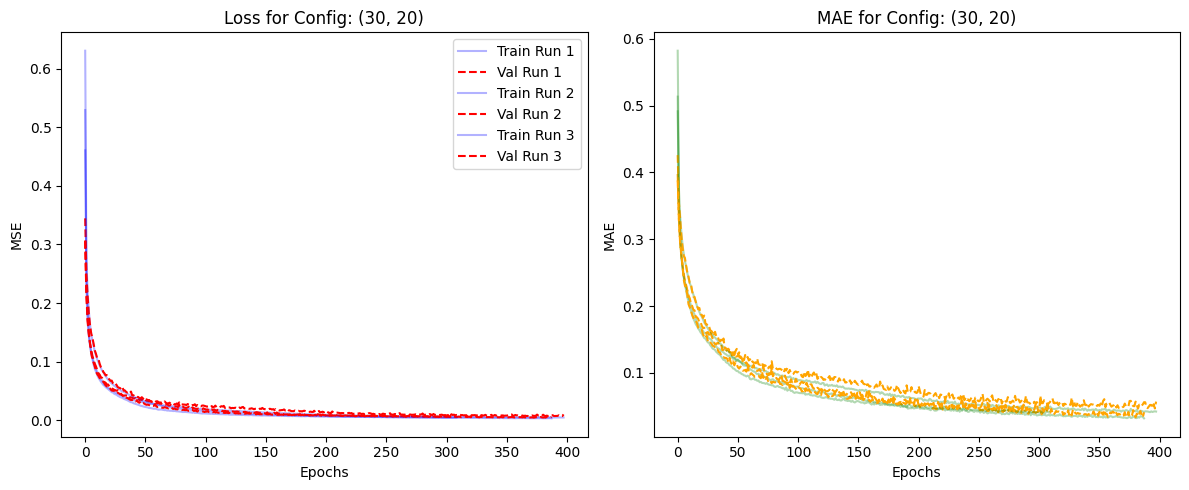

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(all_results, config_index=0):
    # Filter results for a specific configuration
    config_name = list(set([r['configuration'] for r in all_results]))[config_index]
    runs = [r for r in all_results if r['configuration'] == config_name]

    plt.figure(figsize=(12, 5))

    # Plot Loss (MSE)
    plt.subplot(1, 2, 1)
    for i, run in enumerate(runs):
        plt.plot(run['history']['loss'], label=f'Train Run {i+1}', alpha=0.3, color='blue')
        plt.plot(run['history']['val_loss'], label=f'Val Run {i+1}', linestyle='--', color='red')
    plt.title(f'Loss for Config: {config_name}')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    for i, run in enumerate(runs):
        plt.plot(run['history']['mae'], alpha=0.3, color='green')
        plt.plot(run['history']['val_mae'], linestyle='--', color='orange')
    plt.title(f'MAE for Config: {config_name}')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')

    plt.tight_layout()
    plt.show()

# Example: Plot the first configuration
plot_learning_curves(all_results, config_index=17)

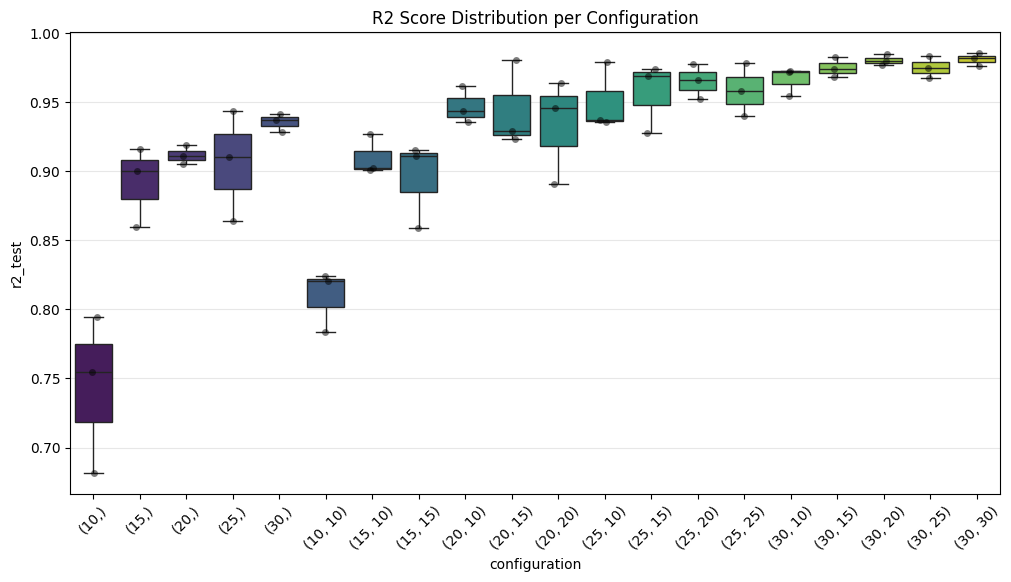

In [ ]:
import pandas as pd
import seaborn as sns

# Convert results to a DataFrame for easier plotting
df_results = pd.DataFrame(all_results)

def plot_config_comparison(df):
    plt.figure(figsize=(12, 6))

    # Boxplot shows the distribution (spread) of R2 scores across the 3 runs
    sns.boxplot(x='configuration', y='r2_test', data=df, palette='viridis')
    sns.stripplot(x='configuration', y='r2_test', data=df, color='black', alpha=0.5)

    plt.title('R2 Score Distribution per Configuration')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

plot_config_comparison(df_results)

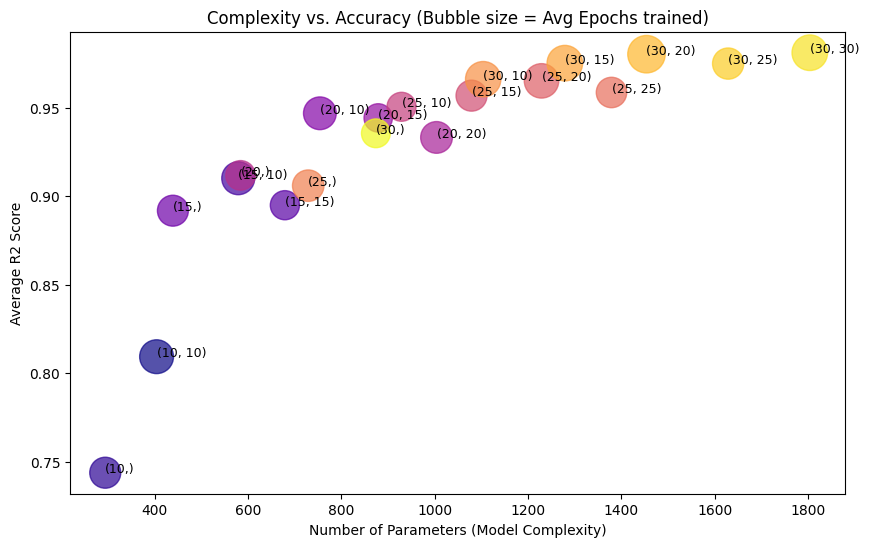

In [ ]:
def plot_efficiency(df):
    plt.figure(figsize=(10, 6))

    # Group by configuration to get averages
    avg_df = df.groupby('configuration').agg({
        'num_parameters': 'first',
        'r2_test': 'mean',
        'epochs_run': 'mean'
    }).reset_index()

    scatter = plt.scatter(avg_df['num_parameters'], avg_df['r2_test'],
                          s=avg_df['epochs_run']*2, # Bubble size = training time
                          c=range(len(avg_df)), cmap='plasma', alpha=0.7)

    for i, txt in enumerate(avg_df['configuration']):
        plt.annotate(txt, (avg_df['num_parameters'][i], avg_df['r2_test'][i]), fontsize=9)

    plt.xlabel('Number of Parameters (Model Complexity)')
    plt.ylabel('Average R2 Score')
    plt.title('Complexity vs. Accuracy (Bubble size = Avg Epochs trained)')
    plt.show()

plot_efficiency(df_results)